In [1]:
import numpy as np 
import torch
from discrete_network.network import KNNet, KNNetParameters, KNNetState
from discrete_network.method.force_method import  ForceParameters, ForceLearn
from discrete_network.device import device
import matplotlib.pyplot as plt
print(f'Device = {device.type}')



Device = cuda


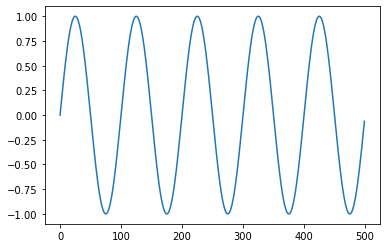

In [2]:
imin = 0; icrit =20000; nt = 21000; dt = 0.001
f_out = (np.sin(20 * np.pi * np.arange(0, nt) * dt)) 
%matplotlib inline
plt.figure()
plt.plot(f_out[0:500])
plt.show()
plt.close()

In [3]:
input_size = 0
hidden_size = 2000
output_size = 1
eps_m = .015
delta_eps = 0.008
a = .25
eps = -delta_eps + 2 * delta_eps * torch.rand(hidden_size, 1).to(device) + eps_m
J = (1 + a - torch.sqrt(1 + a * a - a + 3 * eps)) / 3
J = J.to(device)
KNNetParameters(eps=eps, J=J)


x_initial = 0.6 * torch.rand(hidden_size, 1).to(device)
y_initial = torch.zeros(hidden_size, 1).to(device)
z_initial = torch.zeros(hidden_size, 1).to(device)
ISPC_initial = torch.zeros(hidden_size, 1).to(device)
initial_state = KNNetState(x=x_initial, y=y_initial, z=z_initial, ISPC=ISPC_initial)
net = KNNet(input_size, hidden_size, output_size)
net.to_device(device)
lp = ForceParameters(stop_learning=icrit, start_learning=imin)
fl = ForceLearn(net=net, lp=lp)


In [4]:
f_out = f_out.reshape((f_out.shape[0], 1))
print(f'f_out.shape = {f_out.shape}')

f_out.shape = (21000, 1)


In [5]:
train_logs = fl.train(target_outputs=f_out, state=initial_state)

100%|██████████| 21000/21000 [00:29<00:00, 708.47it/s] 


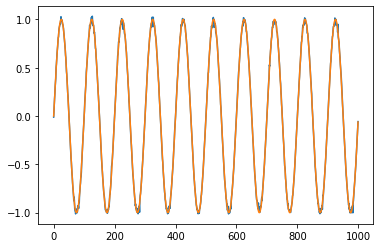

In [10]:
plt.plot(train_logs.numpy()[-1000:, 0, 0])
plt.plot(f_out[-1000:, 0])

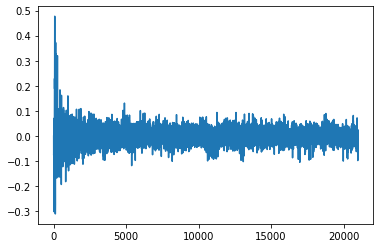

In [9]:
plt.plot((train_logs.numpy()[:, 0, 0] - f_out[:, 0]))